In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as p

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.simplefilter("ignore")

In [4]:
drozdze = pd.read_excel('Drozdze.xlsx')
drozdze.head(15)

,ID,Nazwa,Typ,Temperatura_wzrostu(pH),Zawartość_węglowodanów(%),Zawartość_białka(%),Zawartość_tłuszczu(%),Aktywność_wody,Nazwa.1
0,11,Saccharomyces paradoxus,Ale,20-30,0.10,0.10,0.80,0.90,['MIT']
1,12,Candida utilis,Probiotic,25-37,0.05,0.05,0.90,0.95,['MIT']
2,13,Saccharomyces mikatae,Champagne,15-20,0.45,0.45,0.10,0.90,['MIT']
3,14,Kluyveromyces marxianus,Yogurt,30-40,0.44,0.45,0.11,0.92,['NUC']
4,15,Candida glabrata,Wine,25-35,0.44,0.44,0.12,0.85,['MIT']
5,16,Saccharomyces exiguus,Sourdough,20-30,0.43,0.43,0.13,0.90,['CYT']
6,17,Kluyveromyces lactis,Yogurt,15-20,0.43,0.43,0.14,0.92,['MIT']
7,18,Saccharomyces uvarum,Lager,30-40,0.42,0.42,0.15,0.88,['NUC']
8,19,Candida tropicalis,Wine,25-35,0.42,0.42,0.16,0.85,['MIT']
9,20,Zygosaccharomyces rouxii,Soy Sauce,20-30,0.41,0.41,0.17,0.90,['CYT']


Jako zmienną, którą model ma przewidzieć uznałam Nazwa.1

In [5]:
drozdze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         196 non-null    int64  
 1   Nazwa                      196 non-null    object 
 2   Typ                        130 non-null    object 
 3   Temperatura_wzrostu(pH)    196 non-null    object 
 4   Zawartość_węglowodanów(%)  196 non-null    float64
 5   Zawartość_białka(%)        180 non-null    float64
 6   Zawartość_tłuszczu(%)      185 non-null    float64
 7   Aktywność_wody             196 non-null    float64
 8   Nazwa.1                    196 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 13.9+ KB


In [6]:
drozdze.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,196.00,108.50,56.72,11.00,59.75,108.50,157.25,206.00
Zawartość_węglowodanów(%),196.00,-2.25,35.70,-499.50,0.05,0.35,0.43,1.00
Zawartość_białka(%),180.00,-2.53,37.25,-499.50,0.05,0.29,0.43,0.50
Zawartość_tłuszczu(%),185.00,5.90,73.49,0.10,0.14,0.42,0.90,1000.00
Aktywność_wody,196.00,0.90,0.03,0.85,0.88,0.90,0.92,0.95


In [7]:
null_data = drozdze.isnull().sum()
null_data

ID                            0
Nazwa                         0
Typ                          66
Temperatura_wzrostu(pH)       0
Zawartość_węglowodanów(%)     0
Zawartość_białka(%)          16
Zawartość_tłuszczu(%)        11
Aktywność_wody                0
Nazwa.1                       0
dtype: int64

In [8]:
drozdze[drozdze['Zawartość_białka(%)'].isnull()]

,ID,Nazwa,Typ,Temperatura_wzrostu(pH),Zawartość_węglowodanów(%),Zawartość_białka(%),Zawartość_tłuszczu(%),Aktywność_wody,Nazwa.1
86,97,Kluyveromyces lactis,Yogurt,15-20,0.88,NaN,0.12,0.92,['MIT']
87,98,Saccharomyces uvarum,Lager,30-40,0.87,NaN,0.13,0.88,['ME2']
88,99,Candida tropicalis,Wine,25-35,0.86,NaN,0.14,0.85,['ME2']
89,100,Zygosaccharomyces rouxii,Soy Sauce,20-30,1.00,NaN,NaN,0.90,['ME2']
90,101,Saccharomyces paradoxus,Ale,20-30,1.00,NaN,NaN,0.90,['ME3']
91,102,Candida utilis,Probiotic,25-37,1.00,NaN,NaN,0.95,['VAC']
92,103,Saccharomyces mikatae,Champagne,15-20,1.00,NaN,NaN,0.90,['NUC']
93,104,Kluyveromyces marxianus,Yogurt,30-40,1.00,NaN,NaN,0.92,['ME2']
94,105,Candida glabrata,Wine,25-35,1.00,NaN,NaN,0.85,['EXC']
95,106,Saccharomyces exiguus,Sourdough,20-30,1.00,NaN,NaN,0.90,['VAC']


Chcę wypełnić braki średnimi wartościami kolumn, ale najpierw sprawdzę outliery, aby obliczona średnia nie była zawyżona lub zaniżona.

In [9]:
drozdze_numeric = drozdze.select_dtypes(include=['number'])
drozdze_numeric.drop('ID', axis=1, inplace=True)
drozdze_numeric

,Zawartość_węglowodanów(%),Zawartość_białka(%),Zawartość_tłuszczu(%),Aktywność_wody
0,0.10,0.10,0.80,0.90
1,0.05,0.05,0.90,0.95
2,0.45,0.45,0.10,0.90
3,0.44,0.45,0.11,0.92
4,0.44,0.44,0.12,0.85
...,...,...,...,...
191,0.35,0.35,0.30,0.85
192,0.35,0.35,0.30,0.90
193,0.35,0.35,0.30,0.90
194,0.35,0.35,0.30,0.95


<Axes: >

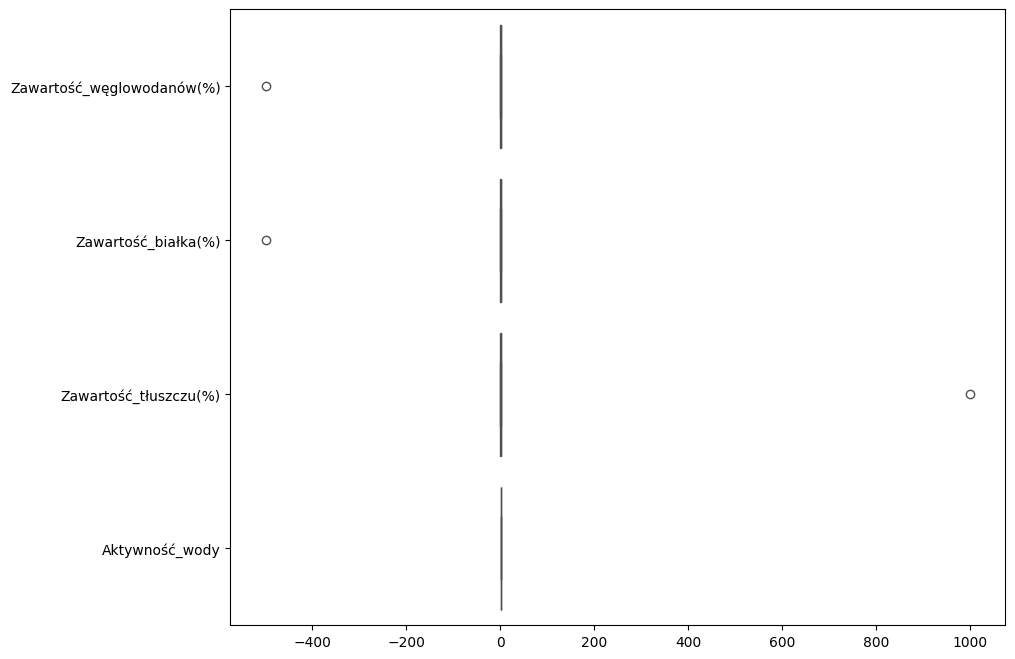

In [10]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=drozdze_numeric.loc[:,drozdze_numeric.columns != 'class_type'], orient='h', palette='rainbow')

In [11]:
def find_outliers(df):
    outliers = []
    
    for column in df.columns:
    
        column_outliers = df[(df[column] < 0) | (df[column] > 1)]
        
        if not column_outliers.empty:
            for index, row in column_outliers.iterrows():
                outliers.append((column, index, row[column]))
        
    return outliers


In [12]:
find_outliers(drozdze_numeric)

[('Zawartość_węglowodanów(%)', 108, -499.5),
 ('Zawartość_białka(%)', 108, -499.5),
 ('Zawartość_tłuszczu(%)', 108, 1000.0)]

In [13]:
drozdze_numeric.loc[108]

Zawartość_węglowodanów(%)   -499.50
Zawartość_białka(%)         -499.50
Zawartość_tłuszczu(%)       1000.00
Aktywność_wody                 0.85
Name: 108, dtype: float64

In [14]:
drozdze_numeric=drozdze_numeric.drop(108)

In [15]:
drozdze_numeric.mean()

Zawartość_węglowodanów(%)   0.30
Zawartość_białka(%)         0.25
Zawartość_tłuszczu(%)       0.50
Aktywność_wody              0.90
dtype: float64

In [16]:
drozdze = drozdze.drop(108)

Wypełniam braki w kolumnie Zawartość_białka(%) wartością średnią tej kolumny.

In [17]:
drozdze['Zawartość_białka(%)'] = drozdze['Zawartość_białka(%)'].fillna(0.25)

To samo z Zawartość_tłuszczu(%)

In [18]:
drozdze['Zawartość_tłuszczu(%)'] = drozdze['Zawartość_tłuszczu(%)'].fillna(0.50)

Usuwam puste wartości w kolumnie 'Typ'

In [19]:
drozdze.dropna(subset=['Typ'], inplace=True)

In [20]:
null_data = drozdze.isnull().sum()
null_data

ID                           0
Nazwa                        0
Typ                          0
Temperatura_wzrostu(pH)      0
Zawartość_węglowodanów(%)    0
Zawartość_białka(%)          0
Zawartość_tłuszczu(%)        0
Aktywność_wody               0
Nazwa.1                      0
dtype: int64

In [21]:
drozdze.head(15)

,ID,Nazwa,Typ,Temperatura_wzrostu(pH),Zawartość_węglowodanów(%),Zawartość_białka(%),Zawartość_tłuszczu(%),Aktywność_wody,Nazwa.1
0,11,Saccharomyces paradoxus,Ale,20-30,0.10,0.10,0.80,0.90,['MIT']
1,12,Candida utilis,Probiotic,25-37,0.05,0.05,0.90,0.95,['MIT']
2,13,Saccharomyces mikatae,Champagne,15-20,0.45,0.45,0.10,0.90,['MIT']
3,14,Kluyveromyces marxianus,Yogurt,30-40,0.44,0.45,0.11,0.92,['NUC']
4,15,Candida glabrata,Wine,25-35,0.44,0.44,0.12,0.85,['MIT']
5,16,Saccharomyces exiguus,Sourdough,20-30,0.43,0.43,0.13,0.90,['CYT']
6,17,Kluyveromyces lactis,Yogurt,15-20,0.43,0.43,0.14,0.92,['MIT']
7,18,Saccharomyces uvarum,Lager,30-40,0.42,0.42,0.15,0.88,['NUC']
8,19,Candida tropicalis,Wine,25-35,0.42,0.42,0.16,0.85,['MIT']
9,20,Zygosaccharomyces rouxii,Soy Sauce,20-30,0.41,0.41,0.17,0.90,['CYT']


Dodanie nowej zmiennej kategorycznej:
(zamiast wysokie, średnie, niskie - 1, 2, 3)

In [22]:
def kategoria_tłuszczu(zawartość_tłuszczu):
    if zawartość_tłuszczu < 0.2:
        return 1
    elif 0.2 <= zawartość_tłuszczu <= 0.5:
        return 2
    else:
        return 3

In [23]:
drozdze["Zawartość_tłuszczu_kategoria"] = drozdze["Zawartość_tłuszczu(%)"].apply(kategoria_tłuszczu)
drozdze.drop('Zawartość_tłuszczu(%)', axis=1, inplace=True)


Zmiana na wartości numeryczne

In [24]:
drozdze['Nazwa'].unique()

array(['Saccharomyces paradoxus', 'Candida utilis',
       'Saccharomyces mikatae', 'Kluyveromyces marxianus',
       'Candida glabrata', 'Saccharomyces exiguus',
       'Kluyveromyces lactis', 'Saccharomyces uvarum',
       'Candida tropicalis', 'Zygosaccharomyces rouxii',
       'Saccharomyces cerevisiae', 'Candida albicans',
       'Saccharomyces pastorianus', 'Saccharomyces boulardii',
       'Saccharomyces bayanus', 'Pichia pastoris'], dtype=object)

In [25]:
drozdze['Typ'].unique()

array(['Ale', 'Probiotic', 'Champagne', 'Yogurt', 'Wine', 'Sourdough',
       'Lager', 'Soy Sauce', 'Beer'], dtype=object)

In [26]:
unique_values_nazwa1 = drozdze['Nazwa.1'].unique()
unique_values_nazwa = drozdze['Nazwa'].unique()
unique_values_typ = drozdze['Typ'].unique()

In [27]:
def assign_numeric(value, unique_values):
    return list(unique_values).index(value)

drozdze['nazwa_numeric'] = drozdze['Nazwa'].apply(lambda x: assign_numeric(x, unique_values_nazwa))
drozdze['typ_numeric'] = drozdze['Typ'].apply(lambda x: assign_numeric(x, unique_values_typ))
drozdze['class_type'] = drozdze['Nazwa.1'].apply(lambda x: assign_numeric(x, unique_values_nazwa1))


Zamiana zakresu z kolumny 'Temperatura_wzrostu(pH)' na wartość numeryczną, biorąc wartość średnią z tego zakresu.

In [28]:
drozdze['Temperatura_wzrostu(pH)'].unique()

array(['20-30', '25-37', '15-20', '30-40', '25-35'], dtype=object)

In [29]:
def range_to_numeric(range_str):
    min_val, max_val = map(int, range_str.split('-'))
    avg_val = (min_val + max_val) / 2
    return avg_val

In [30]:
drozdze['Temperatura_wzrostu(pH)'] = drozdze['Temperatura_wzrostu(pH)'].apply(range_to_numeric)

In [31]:
drozdze.head()

,ID,Nazwa,Typ,Temperatura_wzrostu(pH),Zawartość_węglowodanów(%),Zawartość_białka(%),Aktywność_wody,Nazwa.1,Zawartość_tłuszczu_kategoria,nazwa_numeric,typ_numeric,class_type
0,11,Saccharomyces paradoxus,Ale,25.00,0.10,0.10,0.90,['MIT'],3,0,0,0
1,12,Candida utilis,Probiotic,31.00,0.05,0.05,0.95,['MIT'],3,1,1,0
2,13,Saccharomyces mikatae,Champagne,17.50,0.45,0.45,0.90,['MIT'],1,2,2,0
3,14,Kluyveromyces marxianus,Yogurt,35.00,0.44,0.45,0.92,['NUC'],1,3,3,1
4,15,Candida glabrata,Wine,30.00,0.44,0.44,0.85,['MIT'],1,4,4,0


In [32]:
drozdze_numeric = drozdze.select_dtypes(include=['number'])
drozdze_numeric.drop('ID', axis=1, inplace=True)
drozdze_numeric

,Temperatura_wzrostu(pH),Zawartość_węglowodanów(%),Zawartość_białka(%),Aktywność_wody,Zawartość_tłuszczu_kategoria,nazwa_numeric,typ_numeric,class_type
0,25.00,0.10,0.10,0.90,3,0,0,0
1,31.00,0.05,0.05,0.95,3,1,1,0
2,17.50,0.45,0.45,0.90,1,2,2,0
3,35.00,0.44,0.45,0.92,1,3,3,1
4,30.00,0.44,0.44,0.85,1,4,4,0
...,...,...,...,...,...,...,...,...
125,25.00,0.06,0.06,0.90,3,5,5,0
126,35.00,0.08,0.08,0.92,3,6,3,2
127,17.50,0.08,0.08,0.88,3,7,6,1
128,30.00,0.05,0.05,0.85,3,8,4,3


In [33]:
file_path = 'drozdze_numeric.csv'

drozdze_numeric.to_csv(file_path, index=False)

## PCA 

In [34]:
X = drozdze_numeric.drop(columns=['class_type']) #zbiór bez zmiennej celu
y = drozdze_numeric['class_type'] #zmienna celu

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

PCA()

In [36]:
explained_variance_ratio = pca.explained_variance_ratio_

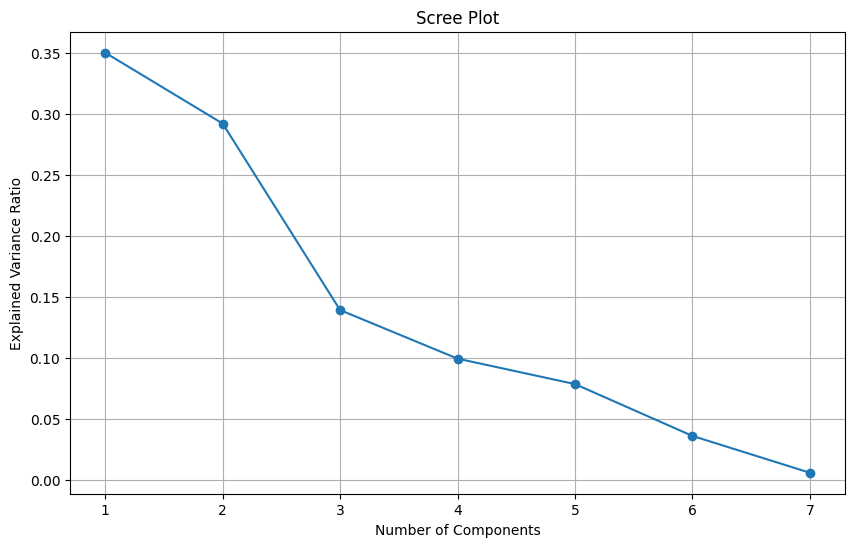

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [38]:
pca_optimal = PCA(n_components=5)
X_pca_optimal = pd.DataFrame(pca_optimal.fit_transform(X_scaled))
X_pca_optimal.head()

,0,1,2,3,4
0,2.27,-1.98,0.73,-0.69,-0.07
1,2.68,-2.12,-0.73,0.69,0.09
2,-1.28,-1.33,1.42,-0.02,-0.27
3,-0.84,-0.75,-1.57,-0.02,-0.34
4,-1.00,0.71,-0.04,-1.48,-0.58


In [39]:
pca_optimal.explained_variance_ratio_

array([0.34988327, 0.29183021, 0.13901349, 0.09922617, 0.07838688])

In [40]:
pca_optimal.explained_variance_ratio_.sum()

0.9583400180358111

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y, train_size=0.80, random_state=1)

In [42]:
print(drozdze_numeric.shape)
print(X_pca_optimal.shape)

(129, 8)
(129, 5)
